In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
States=pd.DataFrame()
States_index=['Rajasthan','Gujarat']

In [4]:
for state in States_index:
  filename = "/content/gdrive/My Drive/BITS/4-2/ASM_sop/"+state+"1/dataset.csv"
  # The data of all the files from year 2000-2014 of AP have been combined and put into one file called Dataset
  df = pd.read_csv(filename)
  df=df.iloc[:,:17]
  df['Date']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2) + df['Hour'].astype(str).str.zfill(2)+df['Minute'].astype(str)
  df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
  X=df[['Date','GHI']]
  X.set_index('Date',inplace=True)
  X=X.between_time('08:00','17:00',include_start=True,include_end=True)
  X=X.reset_index()
  y=X.resample('D',on='Date').mean()
  y=y.dropna()
  y=y[:'2011']
  y=y.reset_index()
  print(y['GHI'])
  #y_w=y.resample('W-FRI').mean()
  States[state]=y['GHI']

0       420.4
1       418.5
2       423.3
3       421.2
4       418.1
        ...  
4375    407.9
4376    408.3
4377    406.8
4378    406.8
4379    406.7
Name: GHI, Length: 4380, dtype: float64
0       226.1
1       227.8
2       227.9
3       225.9
4       228.8
        ...  
4375    215.5
4376    218.6
4377    218.8
4378    218.8
4379    217.8
Name: GHI, Length: 4380, dtype: float64


In [24]:
States.rename(columns={'Rajasthan':'Pokhran, Rajasthan', 'Gujarat':' Bitta, Gujarat'},inplace=True)

Text(0, 0.5, 'GHI value')

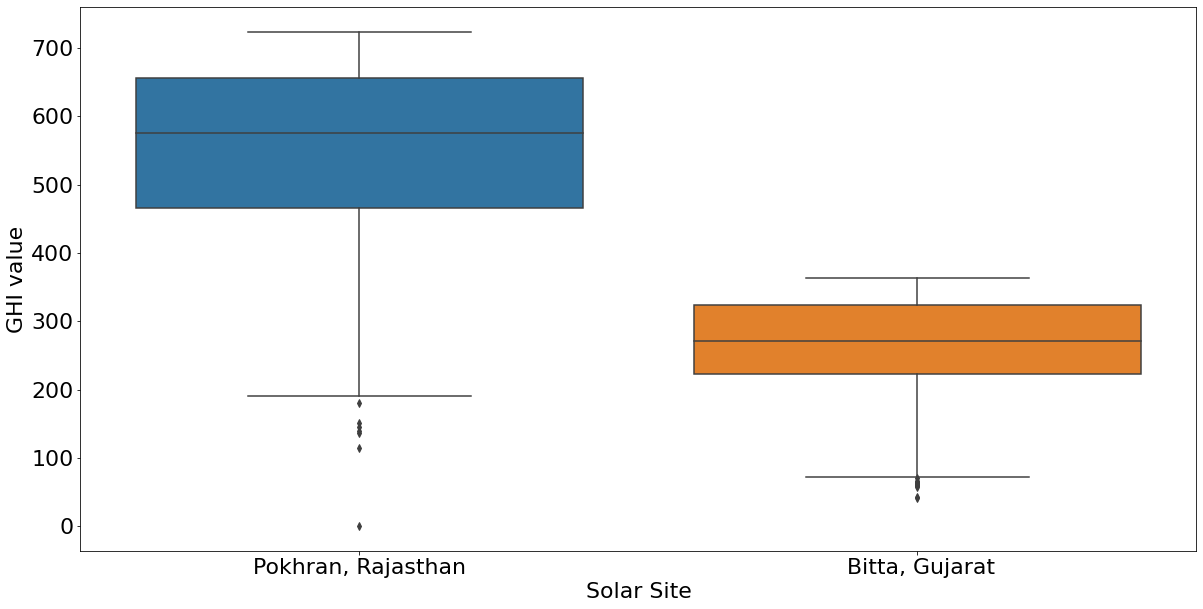

In [27]:
import seaborn as sns
from matplotlib import rcParams

# figure size in inches
#rcParams['figure.figsize'] = 20,10
plt.rcParams.update({'font.size': 22, 'figure.figsize':(25,10)})


#States.boxplot(figsize=(20,10))
#pd.melt(States)
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 20,10

sns.boxplot(x='variable',y='value',data=pd.melt(States))
plt.xlabel('Solar Site')
plt.ylabel('GHI value')

In [26]:
pd.melt(States).groupby(['variable'])['value'].describe()

,count,mean,std,min,25%,50%,75%,max
variable,,,,,,,,
"Bitta, Gujarat",4380.0,269.414429,61.749885,41.7,222.8,271.65,323.8,363.6
"Pokhran, Rajasthan",4380.0,557.276393,110.038394,0.0,465.5,575.90,655.6,723.7


In [ ]:
States.std()/States.mean()

Karnataka        0.230060
AndhraPradesh    0.186598
Rajasthan        0.197457
Gujarat          0.229200
TamilNadu        0.212740
Telangana        0.262560
dtype: float64

In [ ]:
States.std()

Karnataka         54.318817
AndhraPradesh    106.338687
Rajasthan        110.038394
Gujarat           61.749885
TamilNadu        117.592530
Telangana         54.967695
dtype: float64